In [1]:
from pyprojroot import here
import sys
import os
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/gonzalo/Downloads/ML4CC General-bb3a2964c9d4.json"
sys.path.append(str(here()))

In [2]:
import geopandas as gpd
from src.data.copernicusEMS import activations

In [3]:
table_activations_ems = activations.table_floods_ems(event_start_date="2017-01-01")
table_activations_ems = table_activations_ems.set_index("Code")
table_activations_ems

,Title,CodeDate,Type,Country
Code,,,,
EMSR502,Flood in Southern Ireland,2021-02-23,Flood,Ireland
EMSR501,Flood in Albania,2021-01-06,Flood,Albania
EMSR498,"Flood in Corrèze department, France",2021-02-02,Flood,France
EMSR497,Flood in Germany,2021-02-01,Flood,Germany
EMSR496,"Flood in Lazio Region, Italy",2021-01-26,Flood,Italy
...,...,...,...,...
EMSR223,Windfall damage in Poland,2017-08-12,Storm,Poland
EMSR215,Flood in Braunschweig,2017-07-27,Flood,Germany
EMSR205,"Floods in Sabaragamuwa/West, Sri Lanka",2017-05-24,Flood,Sri Lanka


In [4]:
activation = "EMSR486"
# activation = "EMSR271"

zip_files_activation = activations.fetch_zip_files(activation)
zip_files_activation

['https://emergency.copernicus.eu/mapping/download/183885/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183886/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183878/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector.zip',
 'https://emergency.copernicus.eu/mapping/download/183879/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector.zip']

In [5]:
from tqdm import tqdm

unzip_files_activation = []
for zip_file in tqdm(zip_files_activation):
    local_zip_file = activations.download_vector_cems(zip_file)
    unzipped_file = activations.unzip_copernicus_ems(local_zip_file,
                                                     folder_out=f"Copernicus_EMS_raw/{activation}")
    unzip_files_activation.append(unzipped_file)

unzip_files_activation

100%|██████████| 4/4 [00:00<00:00, 716.27it/s]

	File https://emergency.copernicus.eu/mapping/download/183885/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183886/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183878/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector.zip exists will not be download
	File https://emergency.copernicus.eu/mapping/download/183879/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector.zip exists will not be download


['Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector',
 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector']

In [6]:
code_date = table_activations_ems.loc[activation]["CodeDate"]

registers = []
for unzip_folder in unzip_files_activation:
    register = activations.filter_register_copernicusems(unzip_folder, code_date)
    registers.append(register)
    print(register["name"])


EMSR486_AOI02_DEL_PRODUCT_r1_RTP01_v1_vector
EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector
EMSR486_AOI06_GRA_PRODUCT_r1_RTP01_v1_vector
EMSR486_AOI06_GRA_PRODUCT_r1_VECTORS_v1_vector


In [9]:
register = registers[1]
register

{'name': 'EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector',
 'ems_code': 'EMSR486',
 'timestamp': Timestamp('2020-12-03 09:32:00+0000', tz='UTC'),
 'satellite': 'SPOT-6-7',
 'area_of_interest': <shapely.geometry.polygon.Polygon at 0x7f21af040070>,
 'timestamp_ems_code': datetime.datetime(2020, 11, 28, 0, 0, tzinfo=datetime.timezone.utc),
 'observed_event_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_observedEventA_r1_v1.shp',
 'area_of_interest_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_areaOfInterestA_r1_v1.shp',
 'satellite_pre_event': 'SPOT-6-7',
 'timestamp_pre_event': Timestamp('2020-08-23 10:07:00+0000', tz='UTC'),
 'hydrology_file': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR486_AOI02_DEL_PRODUCT_hydrographyA_r1_v1.shp',
 'hydrology_file_l': 'Copernicus_EMS_raw/EMSR486/EMSR486_AOI02_DEL_PRODUCT_r1_VECTORS_v1_vector/EMSR

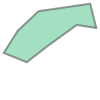

In [11]:
register["area_of_interest"]

In [12]:
# from imp import reload
# reload(activations)
floodmap = activations.generate_floodmap(register, None)
floodmap

,geometry,w_class,source
0,"POLYGON ((9.73630 40.65413, 9.73640 40.65384, ...",Flooded area,flood
1,"POLYGON ((9.43073 40.48629, 9.43105 40.48624, ...",Flooded area,flood
2,"POLYGON ((9.73300 40.64552, 9.73289 40.64541, ...",Flooded area,flood
3,"POLYGON ((9.73272 40.64477, 9.73259 40.64475, ...",Flooded area,flood
4,"POLYGON ((9.73443 40.64483, 9.73446 40.64479, ...",Flooded area,flood
...,...,...,...
182,"POLYGON ((9.70701 40.67113, 9.70655 40.67087, ...",BH130-Reservoir,hydro
183,"MULTIPOLYGON (((9.52815 40.63265, 9.52861 40.6...",BH140-River,hydro
184,"POLYGON ((9.64134 40.62771, 9.64126 40.62756, ...",BH080-Lake,hydro
185,"POLYGON ((9.63985 40.62859, 9.63976 40.62841, ...",BH080-Lake,hydro


In [21]:
register["area_of_interest"]

AttributeError: 'Polygon' object has no attribute 'tolist'

In [ ]:
ee.Initialize()

date_event = register["timestamp"]
lat,lng = 15.445372970198596, -87.91212639442612


date_end_search = date_event + timedelta(days=20)
lng_size, lat_size = .1,.1
bbox = (lng-lng_size,lat-lat_size, 
        lng+lng_size,lat+lat_size)

loc = ee.Geometry.Polygon(generate_polygon(bbox))

img_col_all,n_images_col = ee_download.get_collection("COPERNICUS/S2",date_event,date_end_search,loc)


In [ ]:
import ee

date_event = datetime.strptime("19-11-2020","%d-%m-%Y")
lat,lng = 15.445372970198596, -87.91212639442612


date_end_search = date_event + timedelta(days=20)
lng_size, lat_size = .1,.1
bbox = (lng-lng_size,lat-lat_size, 
        lng+lng_size,lat+lat_size)

loc = ee.Geometry.Polygon(generate_polygon(bbox))

img_col_all,n_images_col = ee_download.get_collection("COPERNICUS/S2",date_event,date_end_search,loc)

In [ ]:
from src.data import create_gt



In [21]:
from shapely.ops import cascaded_union

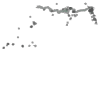

In [39]:
area_of_interest = gpd.read_file(register["hydrology_file"])
pol_union = cascaded_union(area_of_interest["geometry"])
pol_union

In [47]:
observed_event = gpd.read_file(register["observed_event_file"])
observed_event

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,2.332856,"POLYGON ((9.73630 40.65413, 9.73640 40.65384, ..."
1,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.162315,"POLYGON ((9.43073 40.48629, 9.43105 40.48624, ..."
2,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.111646,"POLYGON ((9.73300 40.64552, 9.73289 40.64541, ..."
3,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.193829,"POLYGON ((9.73272 40.64477, 9.73259 40.64475, ..."
4,5-Flood,Flash flood,Photo-interpretation,Flooded area,2,0.082182,"POLYGON ((9.73443 40.64483, 9.73446 40.64479, ..."
...,...,...,...,...,...,...,...
89,5-Flood,Flash flood,Photo-interpretation,Flood trace,2,0.114370,"POLYGON ((9.69964 40.58266, 9.69960 40.58263, ..."
90,5-Flood,Flash flood,Photo-interpretation,Flood trace,2,1.610853,"POLYGON ((9.55510 40.63323, 9.55454 40.63283, ..."
91,5-Flood,Flash flood,Photo-interpretation,Flood trace,2,0.522654,"POLYGON ((9.55781 40.63337, 9.55758 40.63333, ..."
92,5-Flood,Flash flood,Photo-interpretation,Flood trace,2,0.298164,"POLYGON ((9.57328 40.64061, 9.57316 40.64056, ..."


In [43]:
hydro = gpd.read_file(register["hydrology_file"])
hydro

,obj_type,name,notation,or_src_id,cd_value,geometry
0,BH130-Reservoir,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.66020 40.61256, 9.66019 40.61247, ..."
1,BH080-Lake,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.27296 40.43756, 9.27290 40.43755, ..."
2,BH080-Lake,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.27324 40.43845, 9.27323 40.43838, ..."
3,BH080-Lake,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.29022 40.45111, 9.29018 40.45109, ..."
4,BH080-Lake,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.29365 40.45952, 9.29357 40.45952, ..."
...,...,...,...,...,...,...
87,BH130-Reservoir,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.63657 40.61001, 9.63645 40.60999, ..."
88,BH130-Reservoir,Unknown,Not Applicable,994,Not Applicable,"POLYGON ((9.70701 40.67113, 9.70655 40.67087, ..."
89,BH140-River,Unknown,Not Applicable,1,Not Applicable,"MULTIPOLYGON (((9.52815 40.63265, 9.52861 40.6..."
90,BH080-Lake,Unknown,Not Applicable,1,Not Applicable,"POLYGON ((9.64134 40.62771, 9.64126 40.62756, ..."


In [25]:
str(pol_union)

'MULTIPOLYGON (((22.79885178900003 39.47830100800007, 22.79892590000003 39.47822689600008, 22.79974112100007 39.47822689600008, 22.79974112100007 39.47815278500008, 22.79981523200007 39.47807867400007, 22.79981523200007 39.47800456300007, 22.79974112100007 39.47800456300007, 22.79966701000006 39.47793045200007, 22.79959289900006 39.47793045200007, 22.79951878800006 39.47785634100006, 22.79951878800006 39.47778223000006, 22.79944467700005 39.47770811900006, 22.79944467700005 39.47763400800005, 22.79937056600005 39.47755989800004, 22.79929645500005 39.47748578700003, 22.79929645500005 39.47741167600003, 22.79922234400004 39.47733756500003, 22.79914823300004 39.47726345400002, 22.79914823300004 39.47704112000008, 22.79907412200004 39.47704112000008, 22.79900001100003 39.47696700900008, 22.79885178900003 39.47681878700007, 22.79885178900003 39.47674467600007, 22.79877767800008 39.47667056500006, 22.79862945600007 39.47667056500006, 22.79848123400006 39.47652234400005, 22.79840712300006 39.